# Student Academic Performace Analysis

## 1. Import libraries

In [4]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 2. Prepare & Introduction Data

In [5]:
df = pd.read_csv('EducationData.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### 2.1. Control of Null Data

In [6]:
df.isnull().values.any()

False

### 2.2. Information of Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


## 3. Data Visualization

### 3.1. Number of Students by Class

In [8]:
df['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

### 3.2. Gender Distribution of Students

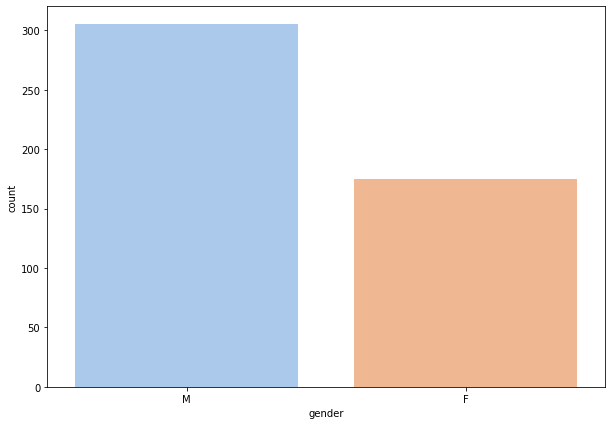

In [9]:
fig= plt.subplots(figsize=(10,7))
sns.countplot(x='gender',data=df,palette="pastel" )
plt.show()

### 3.3. Gender Distribution by Class

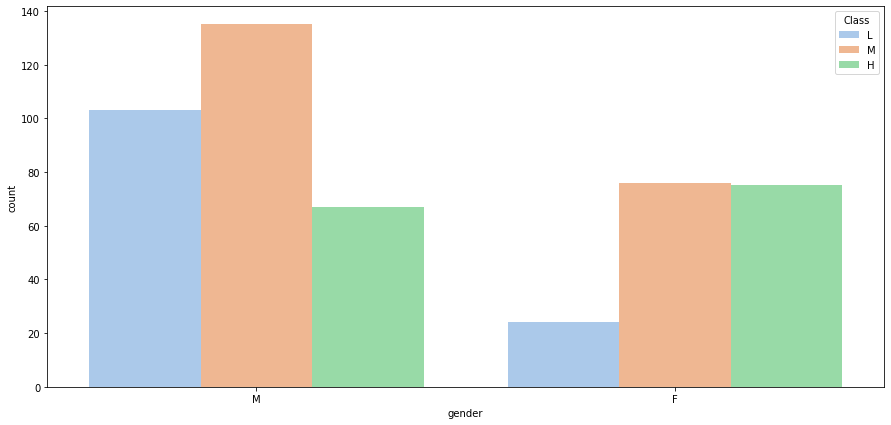

In [10]:
fig= plt.subplots(figsize=(15,7))

sns.countplot(x='gender', hue='Class', data=df,hue_order = ['L', 'M', 'H'],palette="pastel" )

plt.show()

### 3.4. General Distribution of Parent

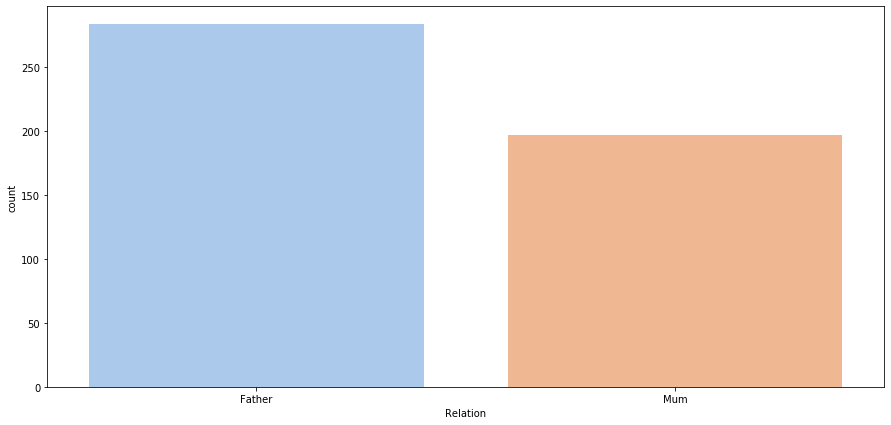

In [11]:
f=plt.figure(figsize=(15,7))

sns.countplot(x="Relation", data=df, palette="pastel");

plt.show()

### 3.5. Parent Distribution by Class

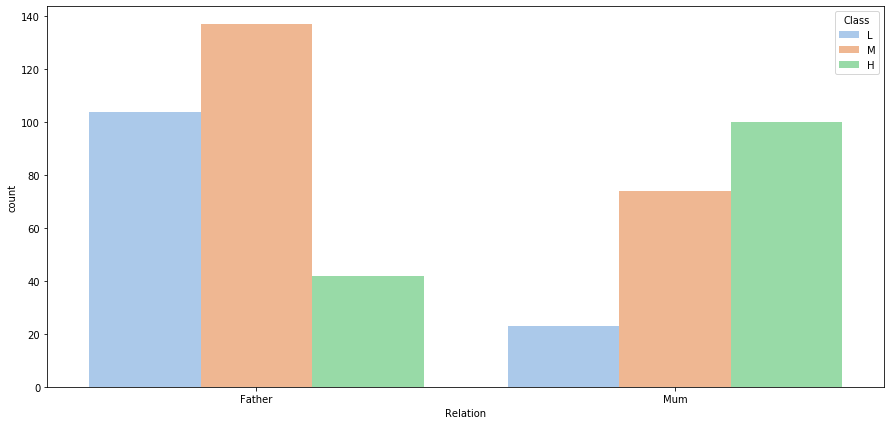

In [12]:
fig= plt.subplots(figsize=(15,7))

sns.countplot(x='Relation', hue='Class', data=df,hue_order = ['L', 'M', 'H'],palette="pastel" )

plt.show()

### 3.6. Parents who answered the questionnarie

([<matplotlib.patches.Wedge at 0x265c05e4988>,
 [Text(0.21459935421774118, 1.0788638084435536, 'No'),
  Text(-0.21459935421774154, -1.0788638084435533, 'Yes')],
 [Text(0.117054193209677, 0.5884711682419382, '43.8%'),
  Text(-0.1170541932096772, -0.5884711682419381, '56.2%')])

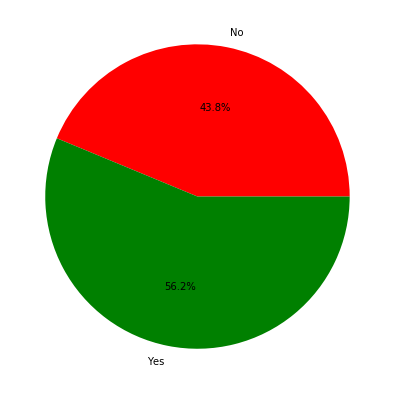

In [13]:
plt.figure(figsize = (7,7))
colors=["red","green"]

count = df.ParentAnsweringSurvey.groupby(df.ParentAnsweringSurvey).count()
Answer = count.keys()

pie(count,labels=Answer, colors=colors, autopct='%1.1f%%')

### 3.7. Parent School Satisfaction

([<matplotlib.patches.Wedge at 0x265c06a39c8>,
 [Text(0.367187499852162, 1.0369056562447323, 'Bad'),
  Text(-0.3671874027700463, -1.0369056906233025, 'Good')],
 [Text(0.20028409082845197, 0.5655849034062175, '39.2%'),
  Text(-0.2002840378745707, -0.5655849221581649, '60.8%')])

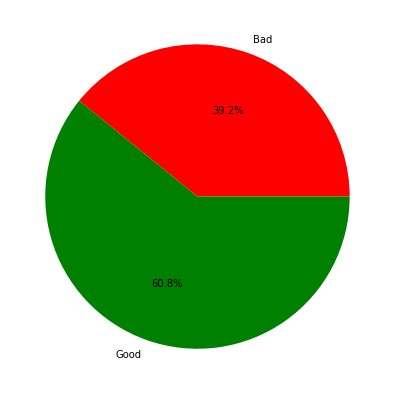

In [14]:
plt.figure(figsize = (7,7))
colors=["red","green"]

count = df.ParentschoolSatisfaction.groupby(df.ParentschoolSatisfaction).count()
Satisfaction = count.keys()

pie(count,labels=Satisfaction, colors=colors, autopct='%1.1f%%')

### 3.8. Student by Country

([<matplotlib.patches.Wedge at 0x265c06f6508>,
 [Text(1.0980921710516107, 0.06475788658657816, 'Egypt'),
  Text(1.0864571737484023, 0.17207791726608623, 'Iran'),
  Text(1.0369056369067826, 0.3671875544608505, 'Iraq'),
  Text(-0.043185762602839704, 1.0991519412294242, 'Jordan'),
  Text(-0.7929390090164562, -0.7623960440479742, 'KW'),
  Text(0.4342181791359733, -1.0106703581820533, 'Lybia'),
  Text(0.49938949064026056, -0.9801072067065221, 'Morocco'),
  Text(0.6922523804646723, -0.8548605978409549, 'Palestine'),
  Text(0.885667877025822, -0.6523744412563798, 'SaudiArabia'),
  Text(0.9562072269604245, -0.5437533807790581, 'Syria'),
  Text(1.0162674635929674, -0.4209518291233769, 'Tunis'),
  Text(1.0587007448982086, -0.2985845487495601, 'USA'),
  Text(1.0915056963439576, -0.13643795237650158, 'lebanon'),
  Text(1.099976439459457, -0.007199488460701627, 'venzuela')],
 [Text(0.5989593660281513, 0.035322483592679, '1.9%'),
  Text(0.5926130038627648, 0.09386068214513793, '1.3%'),
  Text(0.5655

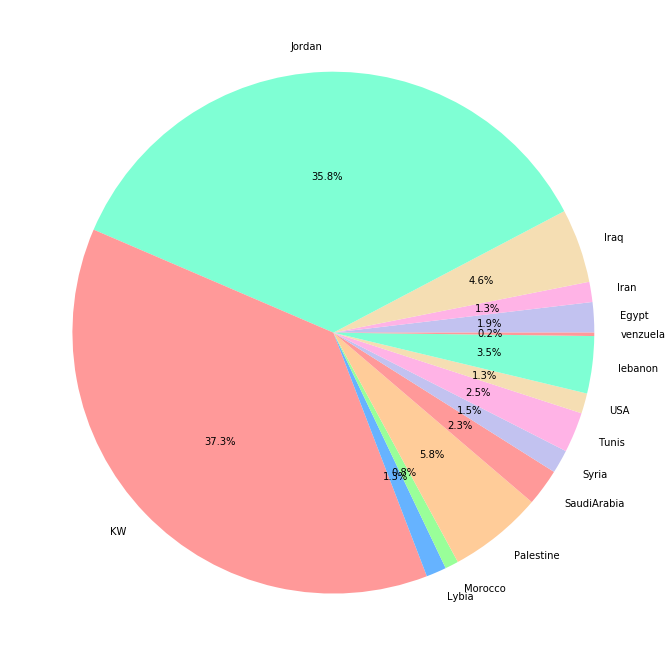

In [15]:
group_by_sum_of_nationalities = df.NationalITy.groupby(df.NationalITy).count()
group_by_sum_of_nationalities_header = group_by_sum_of_nationalities.keys()

plt.figure(figsize = (15,12))
colors=['#c2c2f0','#ffb3e6',"wheat","aquamarine",'#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999']

#print(group_by_sum_of_nationalities_header)
pie(group_by_sum_of_nationalities,labels=group_by_sum_of_nationalities_header, colors=colors, autopct='%1.1f%%')

### 3.9. Total Raisedhands

In [16]:
pd.DataFrame(df['raisedhands'].loc[0:481]).astype(int).sum()

raisedhands    22452
dtype: int64

### 3.10. Distribution of Courses Taken by Female-Male Students 

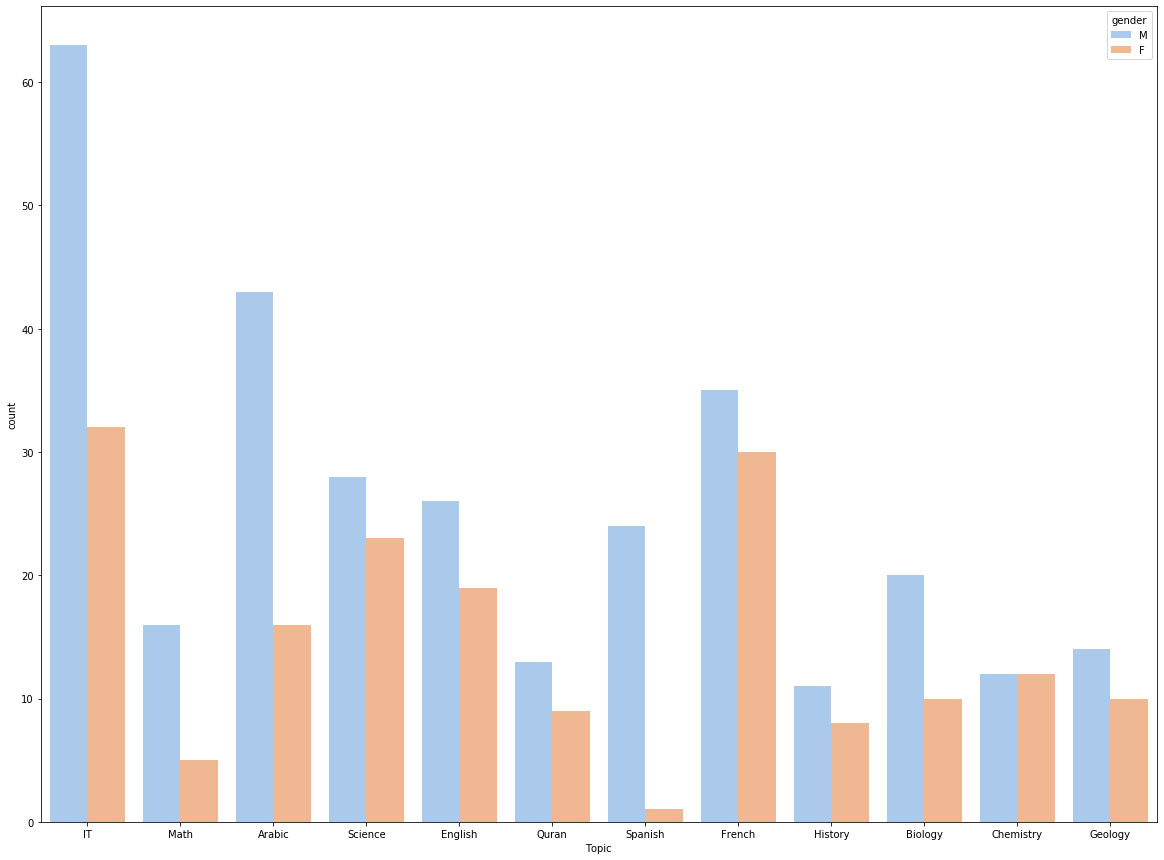

In [17]:
plt.figure(figsize = (20,15))

sns.countplot(x='Topic', hue='gender', data=df, hue_order = ['M', 'F'], palette="pastel")

### 3.11. Distribution of Female-Male Students  by Countries

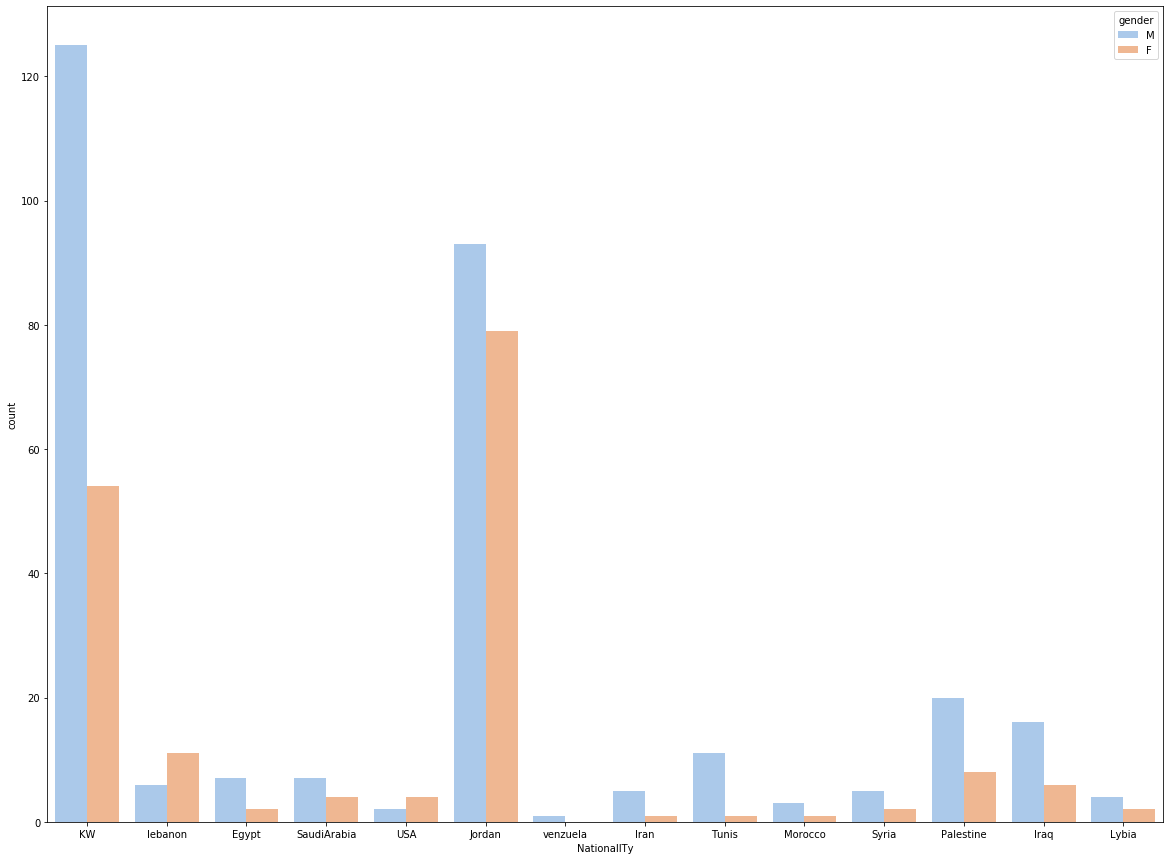

In [18]:
plt.figure(figsize = (20,15))

sns.countplot(x='NationalITy', hue='gender', data=df, palette="pastel")

### 3.12. Distribution by Class Grade

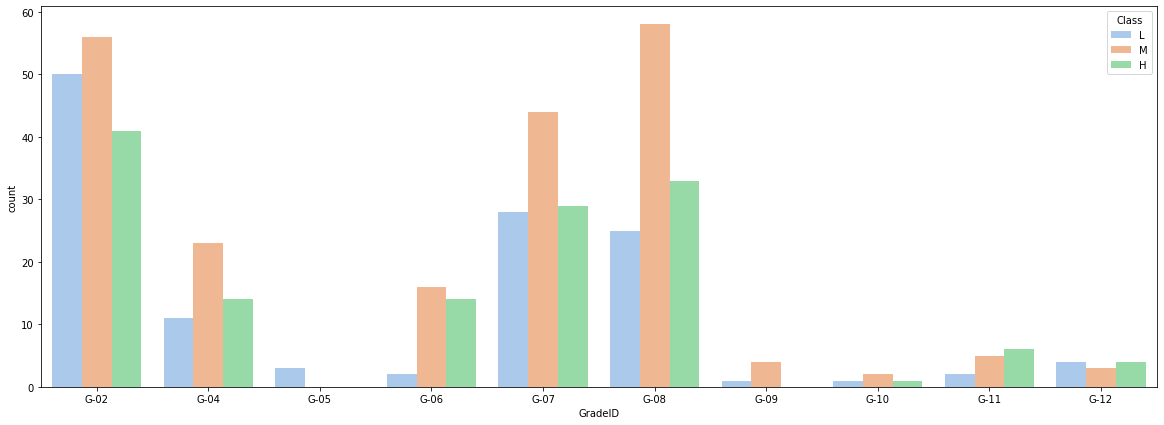

In [19]:
f=plt.figure(figsize=(20,7))

sns.countplot(x='GradeID', hue='Class', data=df, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], palette="pastel")
plt.show()

### 3.13. Resources Followed by Class - Tracking Announcements by Class - Handraising by Class - Participation in Discussions by Class 

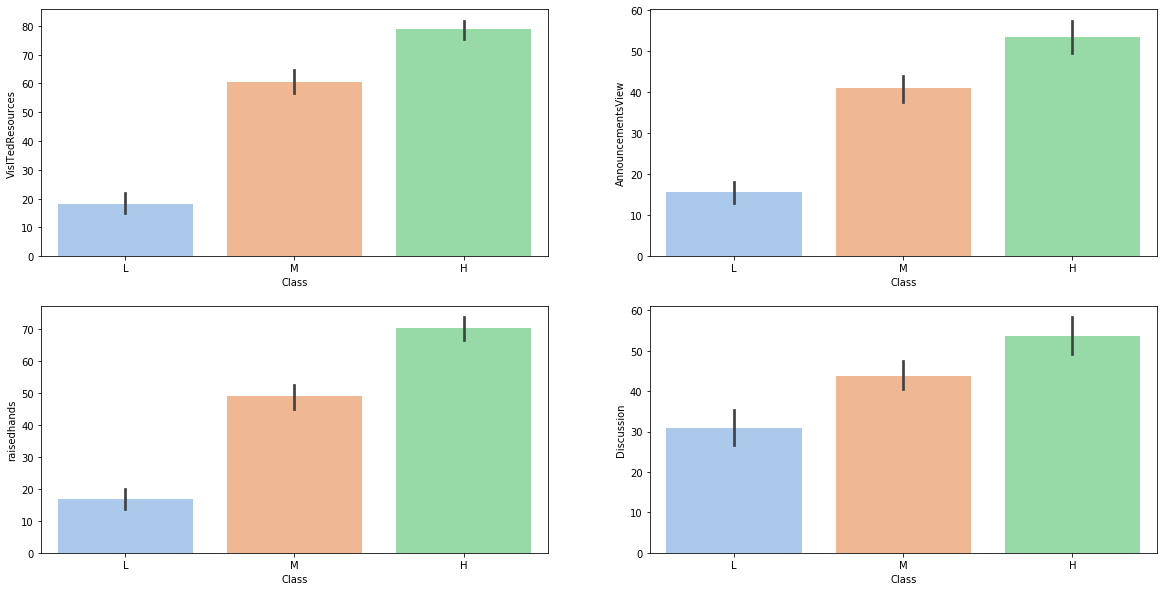

In [20]:
fig, axarr  = plt.subplots(2,2,figsize=(20,10))

sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0],palette="pastel")
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1],palette="pastel")
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0],palette="pastel")
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1],palette="pastel")

### 3.14. Relationships between Numerical Properties

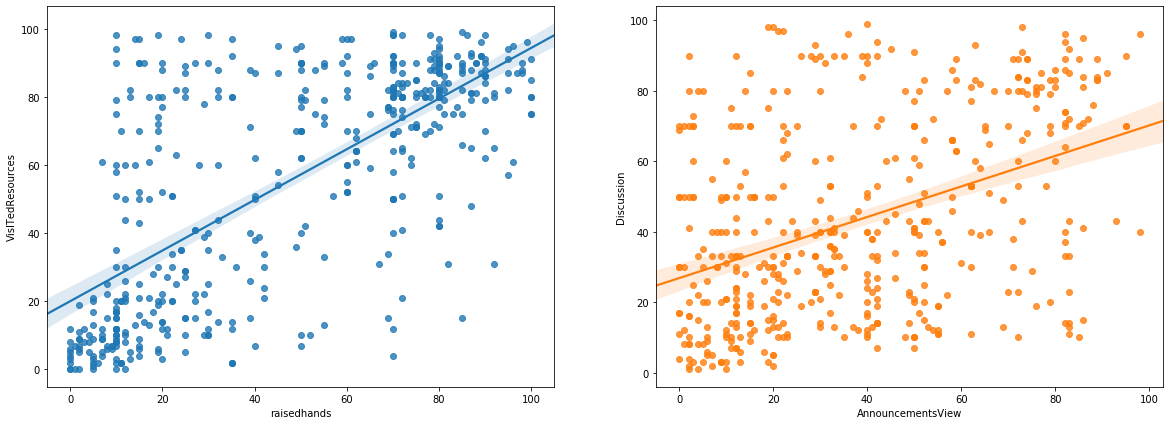

In [21]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(20,7))

sns.regplot(x='raisedhands', y='VisITedResources', data=df, ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=df, ax=axis2)

## 4. Model Selection & Implementation

### 4.1. Statistical Normalization 

In [22]:
# We decided on the data that we will not use
df_selected = df.drop(['NationalITy','StageID','SectionID',
                       'PlaceofBirth', 'GradeID', "Topic", 
                       'Semester', "Relation", 'ParentAnsweringSurvey',
                       "ParentschoolSatisfaction", 'StudentAbsenceDays', 
                       "Class"], axis = 1)

In [23]:
# The final version of data
df_selected

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,M,15,16,2,20
1,M,20,20,3,25
2,M,10,7,0,30
3,M,30,25,5,35
4,M,40,50,12,50
...,...,...,...,...,...
475,F,5,4,5,8
476,F,50,77,14,28
477,F,55,74,25,29
478,F,30,17,14,57


In [24]:
# Change to 0-1 of gender values 
df_selected_copy=df_selected

In [25]:
df_selected_copy.gender=[1 if i=="M" else 0 for i in df_selected_copy.gender]

In [26]:
df_selected_copy

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,15,16,2,20
1,1,20,20,3,25
2,1,10,7,0,30
3,1,30,25,5,35
4,1,40,50,12,50
...,...,...,...,...,...
475,0,5,4,5,8
476,0,50,77,14,28
477,0,55,74,25,29
478,0,30,17,14,57


In [27]:
# Normalization x & y 
y=df_selected_copy.gender.values
x_df=df_selected_copy.drop("gender",axis=1)

In [28]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [29]:
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [30]:
x

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0.15,0.161616,0.020408,0.193878
1,0.20,0.202020,0.030612,0.244898
2,0.10,0.070707,0.000000,0.295918
3,0.30,0.252525,0.051020,0.346939
4,0.40,0.505051,0.122449,0.500000
...,...,...,...,...
475,0.05,0.040404,0.051020,0.071429
476,0.50,0.777778,0.142857,0.275510
477,0.55,0.747475,0.255102,0.285714
478,0.30,0.171717,0.142857,0.571429


### 4.2. Determination of Training and Test Data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

### 4.3. Implementation of Model 

#### 4.3.1. Support Vector Machine 

In [32]:
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(x_train,y_train)

print("Test Accuracy is: ",svm.score(x_test,y_test))

Test Accuracy is:  0.6666666666666666


C:\Users\ayhan\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 4.3.2. Logistic Regression Classification

In [33]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

print("Test Accuracy is: {}".format(lr.score(x_test,y_test)))

Test Accuracy is: 0.6458333333333334


C:\Users\ayhan\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 4.3.3. Random Forest Classification 

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

print("Test Accuracy is: ",rf.score(x_test,y_test))

Test Accuracy is:  0.7083333333333334


#### 4.3.4. Naive Bayes Classification

In [35]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy is: ",nb.score(x_test,y_test))

Test Accuracy is:  0.59375


#### 4.3.5. Decision Tree Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Test Accuracy is: " ,dt.score(x_test,y_test))

Test Accuracy is:  0.625
